In [1]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
# Load the MATLAB file
mat_data = scipy.io.loadmat('ORLData_25.mat')
X = mat_data['ORLData'].T.astype(float)
n, d = X.shape
labels = X[:, -1].astype(int)  
unique_labels = np.unique(labels)
c = len(unique_labels)
X = np.delete(X, -1, axis=1)

In [3]:
# PCA for ORLdata
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
dim = 256
accuracy_scores = []
dimensions = range(10, dim, 5)  
for dim in dimensions:
    pca = PCA(n_components=dim)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train_pca, y_train)
    
    # Predict on the test set
    y_pred = knn.predict(X_test_pca)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    print(f"Dimension: {dim}, Accuracy: {accuracy:.4f}")

Dimension: 10, Accuracy: 0.9500
Dimension: 15, Accuracy: 0.9625
Dimension: 20, Accuracy: 0.9750
Dimension: 25, Accuracy: 0.9875
Dimension: 30, Accuracy: 0.9875
Dimension: 35, Accuracy: 0.9875
Dimension: 40, Accuracy: 0.9875
Dimension: 45, Accuracy: 0.9750
Dimension: 50, Accuracy: 0.9750
Dimension: 55, Accuracy: 0.9750
Dimension: 60, Accuracy: 0.9750
Dimension: 65, Accuracy: 0.9750
Dimension: 70, Accuracy: 0.9750
Dimension: 75, Accuracy: 0.9750
Dimension: 80, Accuracy: 0.9750
Dimension: 85, Accuracy: 0.9750
Dimension: 90, Accuracy: 0.9750
Dimension: 95, Accuracy: 0.9750
Dimension: 100, Accuracy: 0.9750
Dimension: 105, Accuracy: 0.9750
Dimension: 110, Accuracy: 0.9750
Dimension: 115, Accuracy: 0.9750
Dimension: 120, Accuracy: 0.9750
Dimension: 125, Accuracy: 0.9750
Dimension: 130, Accuracy: 0.9750
Dimension: 135, Accuracy: 0.9750
Dimension: 140, Accuracy: 0.9750
Dimension: 145, Accuracy: 0.9750
Dimension: 150, Accuracy: 0.9750
Dimension: 155, Accuracy: 0.9750
Dimension: 160, Accuracy: 0.

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dimensions, accuracy_scores, marker='o', linestyle='-')
plt.title('Classification Accuracy after LDA(ORL)')
plt.xlabel('Number of Dimensions')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig('ORL-LDA.svg',format='svg')
plt.show()

Dimension: 10, Accuracy: 0.9375
Dimension: 15, Accuracy: 0.9500
Dimension: 20, Accuracy: 0.9750
Dimension: 25, Accuracy: 0.9750
Dimension: 30, Accuracy: 0.9875
Dimension: 35, Accuracy: 0.9875


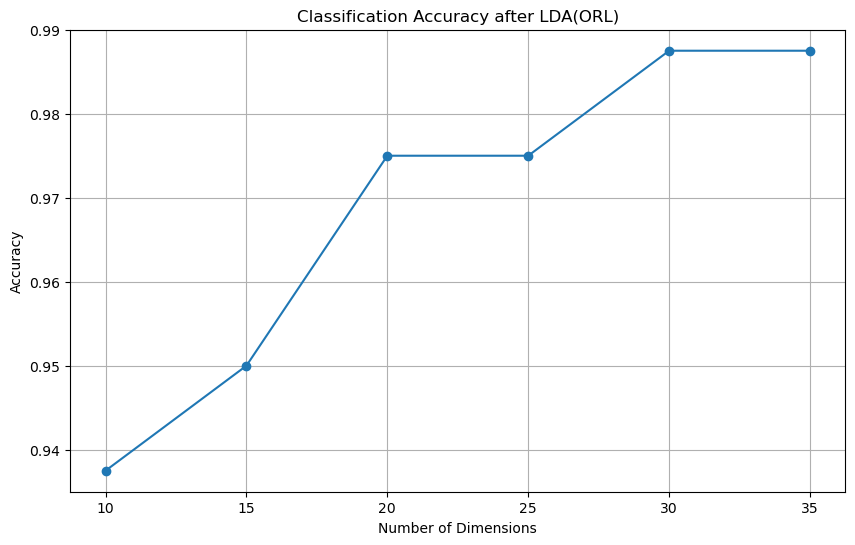

In [34]:
# LDA for ORLdata
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
dimensions = range(10, 40, 5)
accuracy_scores = []
for dim in dimensions:
    lda = LDA(n_components=dim)
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train_lda, y_train)
    
    # Predict on the test set
    y_pred = knn.predict(X_test_lda)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    print(f"Dimension: {dim}, Accuracy: {accuracy:.4f}")

# Plotting the accuracies for different dimensions
plt.figure(figsize=(10, 6))
plt.plot(dimensions, accuracy_scores, marker='o', linestyle='-')
plt.title('Classification Accuracy after LDA(ORL)')
plt.xlabel('Number of Dimensions')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig('ORL-LDA.svg',format='svg')
plt.show()

In [19]:
vehicle = scipy.io.loadmat('vehicle.mat')
train_v = vehicle['UCI_entropy_data']['train_data'][0,0]
train_v = train_v.T.astype(float)
labels_v = train_v[:,-1].astype(int)
X_v = np.delete(train_v, -1, axis=1)

In [40]:
# PCA for Vehicle_data
Xv_train, Xv_test, yv_train, yv_test = train_test_split(X_v, labels_v, test_size=0.2, random_state=42)

accuracyv_scores = []
dimensionsv = range(5, 18, 1) 
for dim in dimensionsv:
    pca = PCA(n_components=dim)
    X_train_pca = pca.fit_transform(Xv_train)
    X_test_pca = pca.transform(Xv_test)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train_pca, yv_train)
    
    # Predict on the test set
    yv_pred = knn.predict(X_test_pca)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(yv_test, yv_pred)
    accuracyv_scores.append(accuracy)

    print(f"Dimension: {dim}, Accuracy: {accuracy:.4f}")

Dimension: 5, Accuracy: 0.7059
Dimension: 6, Accuracy: 0.7059
Dimension: 7, Accuracy: 0.6765
Dimension: 8, Accuracy: 0.6765
Dimension: 9, Accuracy: 0.6765
Dimension: 10, Accuracy: 0.6882
Dimension: 11, Accuracy: 0.6824
Dimension: 12, Accuracy: 0.7000
Dimension: 13, Accuracy: 0.7000
Dimension: 14, Accuracy: 0.7059
Dimension: 15, Accuracy: 0.7059
Dimension: 16, Accuracy: 0.7059
Dimension: 17, Accuracy: 0.7000


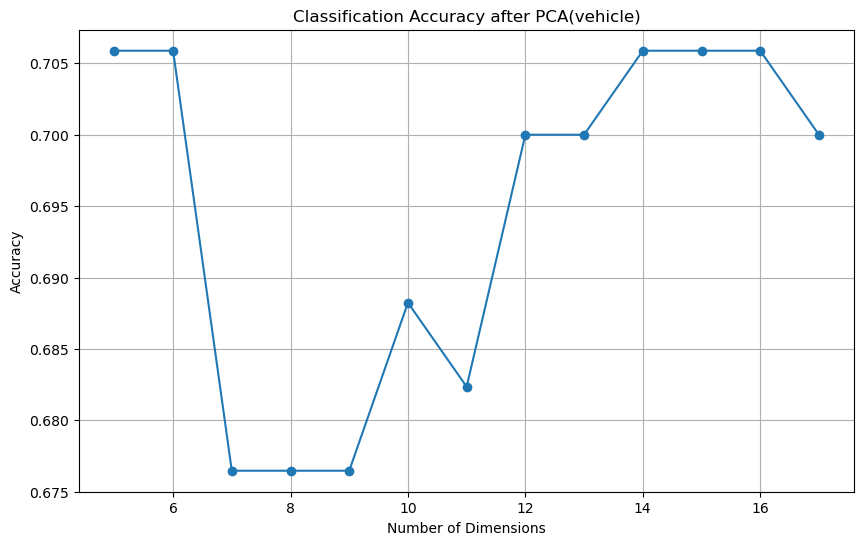

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(dimensionsv, accuracyv_scores, marker='o', linestyle='-')
plt.title('Classification Accuracy after PCA(vehicle)')
plt.xlabel('Number of Dimensions')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig('vehicle-pca.svg',format='svg')
plt.show()

Dimension: 1, Accuracy: 0.5059
Dimension: 2, Accuracy: 0.6588
Dimension: 3, Accuracy: 0.7059


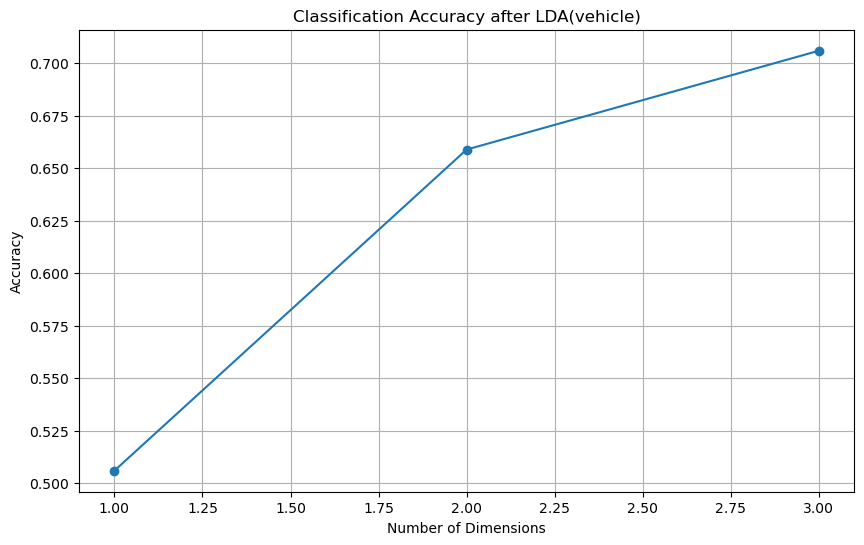

In [35]:
# LDA for Vehicle_data
dimensions = range(1, 4, 1)
accuracy_scores = []
for dim in dimensions:
    # LDA for dimensionality reduction
    lda = LDA(n_components=dim)
    X_train_lda = lda.fit_transform(Xv_train, yv_train)
    X_test_lda = lda.transform(Xv_test)
    
    # Nearest Neighbor classifier (1 nearest neighbor)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train_lda, yv_train)
    
    # Predict on the test set
    y_pred = knn.predict(X_test_lda)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(yv_test, y_pred)
    accuracy_scores.append(accuracy)

    print(f"Dimension: {dim}, Accuracy: {accuracy:.4f}")

# Plotting the accuracies for different dimensions
plt.figure(figsize=(10, 6))
plt.plot(dimensions, accuracy_scores, marker='o', linestyle='-')
plt.title('Classification Accuracy after LDA(vehicle)')
plt.xlabel('Number of Dimensions')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig('vehicle-LDA.svg',format='svg')
plt.show()